In [84]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

In [122]:
class GDRegressor(BaseEstimator):

    def __init__(self, eta=10**-3, n_iter=10, quiet=False):
        self.mse_ = []
        self.weights_ = []
        self.params = {}
        self.params['eta'] = eta
        self.params['n_iter'] = n_iter
        self.params['quiet'] = quiet
        super(GDRegressor, self).set_params(**self.params)
    
    def fit(self, X, y):
        self.w = [0] * (len(X[0]) + 1)
        
        for epoch in range(self.params['n_iter']):
            derivative_w0 = 0
            derivative_wn = [0] * len(X[0])
            for i in range(len(y)):
                y_pred = self.predict([X[i]])[0]
                error = y_pred - y[i]
                derivative_w0 += error
                for j in range(len(X[i])):
                    derivative_wn[j] += error * X[i][j]
            
            eta = self.params['eta'] / (epoch + 1)
            self.w[0] = self.w[0] - eta * derivative_w0
            for j in range(len(X[i])):
                self.w[j+1] = self.w[j+1] - eta * derivative_wn[j]
            mse = mean_squared_error(y, self.predict(X))

            self.mse_.append(mse)
            self.weights_.append(self.w.copy())

            if not self.params['quiet']:
                out = f'>epoch={epoch}, mse={mse:.6f}'
                for i in range(len(self.w)):
                    out += f', w{i}={self.w[i]:.6f}'
                print(out)

        return self

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            pred = self.w[0]
            for j in range(len(X[i])):
                pred += self.w[j+1]*X[i][j]
            y_pred.append(pred)
        return y_pred

In [123]:
gd = GDRegressor(n_iter=1000)
# XOR dataset
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y = np.array([1, 1, 0, 0])
gd.fit(X, y)

>epoch=0, mse=0.497009, w0=0.002000, w1=0.001000, w2=0.001000
>epoch=1, mse=0.495531, w0=0.002994, w1=0.001497, w2=0.001497
>epoch=2, mse=0.494551, w0=0.003655, w1=0.001826, w2=0.001826
>epoch=3, mse=0.493819, w0=0.004149, w1=0.002073, w2=0.002073
>epoch=4, mse=0.493235, w0=0.004544, w1=0.002270, w2=0.002270
>epoch=5, mse=0.492749, w0=0.004873, w1=0.002434, w2=0.002434
>epoch=6, mse=0.492334, w0=0.005155, w1=0.002575, w2=0.002575
>epoch=7, mse=0.491971, w0=0.005401, w1=0.002697, w2=0.002697
>epoch=8, mse=0.491649, w0=0.005619, w1=0.002806, w2=0.002806
>epoch=9, mse=0.491360, w0=0.005816, w1=0.002904, w2=0.002904
>epoch=10, mse=0.491097, w0=0.005995, w1=0.002994, w2=0.002994
>epoch=11, mse=0.490857, w0=0.006158, w1=0.003075, w2=0.003075
>epoch=12, mse=0.490635, w0=0.006309, w1=0.003150, w2=0.003150
>epoch=13, mse=0.490429, w0=0.006449, w1=0.003220, w2=0.003220
>epoch=14, mse=0.490237, w0=0.006580, w1=0.003285, w2=0.003285
>epoch=15, mse=0.490057, w0=0.006703, w1=0.003346, w2=0.003346
>e

>epoch=129, mse=0.484191, w0=0.010731, w1=0.005351, w2=0.005351
>epoch=130, mse=0.484170, w0=0.010745, w1=0.005359, w2=0.005359
>epoch=131, mse=0.484148, w0=0.010760, w1=0.005366, w2=0.005366
>epoch=132, mse=0.484127, w0=0.010775, w1=0.005373, w2=0.005373
>epoch=133, mse=0.484106, w0=0.010789, w1=0.005380, w2=0.005380
>epoch=134, mse=0.484086, w0=0.010803, w1=0.005388, w2=0.005388
>epoch=135, mse=0.484065, w0=0.010818, w1=0.005395, w2=0.005395
>epoch=136, mse=0.484045, w0=0.010832, w1=0.005402, w2=0.005402
>epoch=137, mse=0.484024, w0=0.010846, w1=0.005409, w2=0.005409
>epoch=138, mse=0.484004, w0=0.010860, w1=0.005416, w2=0.005416
>epoch=139, mse=0.483984, w0=0.010874, w1=0.005422, w2=0.005422
>epoch=140, mse=0.483964, w0=0.010887, w1=0.005429, w2=0.005429
>epoch=141, mse=0.483945, w0=0.010901, w1=0.005436, w2=0.005436
>epoch=142, mse=0.483925, w0=0.010914, w1=0.005443, w2=0.005443
>epoch=143, mse=0.483906, w0=0.010928, w1=0.005449, w2=0.005449
>epoch=144, mse=0.483886, w0=0.010941, w

>epoch=257, mse=0.482285, w0=0.012051, w1=0.006008, w2=0.006008
>epoch=258, mse=0.482275, w0=0.012058, w1=0.006011, w2=0.006011
>epoch=259, mse=0.482264, w0=0.012066, w1=0.006015, w2=0.006015
>epoch=260, mse=0.482253, w0=0.012073, w1=0.006019, w2=0.006019
>epoch=261, mse=0.482243, w0=0.012081, w1=0.006022, w2=0.006022
>epoch=262, mse=0.482232, w0=0.012088, w1=0.006026, w2=0.006026
>epoch=263, mse=0.482222, w0=0.012095, w1=0.006030, w2=0.006030
>epoch=264, mse=0.482211, w0=0.012103, w1=0.006033, w2=0.006033
>epoch=265, mse=0.482201, w0=0.012110, w1=0.006037, w2=0.006037
>epoch=266, mse=0.482190, w0=0.012117, w1=0.006041, w2=0.006041
>epoch=267, mse=0.482180, w0=0.012124, w1=0.006044, w2=0.006044
>epoch=268, mse=0.482170, w0=0.012131, w1=0.006048, w2=0.006048
>epoch=269, mse=0.482159, w0=0.012138, w1=0.006051, w2=0.006051
>epoch=270, mse=0.482149, w0=0.012146, w1=0.006055, w2=0.006055
>epoch=271, mse=0.482139, w0=0.012153, w1=0.006058, w2=0.006058
>epoch=272, mse=0.482129, w0=0.012160, w

>epoch=385, mse=0.481172, w0=0.012825, w1=0.006393, w2=0.006393
>epoch=386, mse=0.481165, w0=0.012830, w1=0.006395, w2=0.006395
>epoch=387, mse=0.481158, w0=0.012835, w1=0.006397, w2=0.006397
>epoch=388, mse=0.481150, w0=0.012840, w1=0.006400, w2=0.006400
>epoch=389, mse=0.481143, w0=0.012845, w1=0.006402, w2=0.006402
>epoch=390, mse=0.481136, w0=0.012850, w1=0.006405, w2=0.006405
>epoch=391, mse=0.481129, w0=0.012855, w1=0.006407, w2=0.006407
>epoch=392, mse=0.481122, w0=0.012860, w1=0.006410, w2=0.006410
>epoch=393, mse=0.481115, w0=0.012865, w1=0.006412, w2=0.006412
>epoch=394, mse=0.481108, w0=0.012870, w1=0.006414, w2=0.006414
>epoch=395, mse=0.481101, w0=0.012875, w1=0.006417, w2=0.006417
>epoch=396, mse=0.481094, w0=0.012879, w1=0.006419, w2=0.006419
>epoch=397, mse=0.481087, w0=0.012884, w1=0.006422, w2=0.006422
>epoch=398, mse=0.481080, w0=0.012889, w1=0.006424, w2=0.006424
>epoch=399, mse=0.481074, w0=0.012894, w1=0.006426, w2=0.006426
>epoch=400, mse=0.481067, w0=0.012899, w

>epoch=513, mse=0.480383, w0=0.013375, w1=0.006665, w2=0.006665
>epoch=514, mse=0.480378, w0=0.013379, w1=0.006667, w2=0.006667
>epoch=515, mse=0.480373, w0=0.013383, w1=0.006669, w2=0.006669
>epoch=516, mse=0.480367, w0=0.013386, w1=0.006671, w2=0.006671
>epoch=517, mse=0.480362, w0=0.013390, w1=0.006673, w2=0.006673
>epoch=518, mse=0.480357, w0=0.013394, w1=0.006675, w2=0.006675
>epoch=519, mse=0.480351, w0=0.013397, w1=0.006677, w2=0.006677
>epoch=520, mse=0.480346, w0=0.013401, w1=0.006678, w2=0.006678
>epoch=521, mse=0.480341, w0=0.013405, w1=0.006680, w2=0.006680
>epoch=522, mse=0.480335, w0=0.013408, w1=0.006682, w2=0.006682
>epoch=523, mse=0.480330, w0=0.013412, w1=0.006684, w2=0.006684
>epoch=524, mse=0.480325, w0=0.013416, w1=0.006686, w2=0.006686
>epoch=525, mse=0.480320, w0=0.013419, w1=0.006687, w2=0.006687
>epoch=526, mse=0.480315, w0=0.013423, w1=0.006689, w2=0.006689
>epoch=527, mse=0.480309, w0=0.013427, w1=0.006691, w2=0.006691
>epoch=528, mse=0.480304, w0=0.013430, w

>epoch=641, mse=0.479773, w0=0.013801, w1=0.006877, w2=0.006877
>epoch=642, mse=0.479768, w0=0.013804, w1=0.006879, w2=0.006879
>epoch=643, mse=0.479764, w0=0.013807, w1=0.006880, w2=0.006880
>epoch=644, mse=0.479760, w0=0.013810, w1=0.006882, w2=0.006882
>epoch=645, mse=0.479756, w0=0.013813, w1=0.006883, w2=0.006883
>epoch=646, mse=0.479751, w0=0.013816, w1=0.006884, w2=0.006884
>epoch=647, mse=0.479747, w0=0.013819, w1=0.006886, w2=0.006886
>epoch=648, mse=0.479743, w0=0.013822, w1=0.006887, w2=0.006887
>epoch=649, mse=0.479739, w0=0.013825, w1=0.006889, w2=0.006889
>epoch=650, mse=0.479735, w0=0.013828, w1=0.006890, w2=0.006890
>epoch=651, mse=0.479730, w0=0.013831, w1=0.006892, w2=0.006892
>epoch=652, mse=0.479726, w0=0.013834, w1=0.006893, w2=0.006893
>epoch=653, mse=0.479722, w0=0.013837, w1=0.006895, w2=0.006895
>epoch=654, mse=0.479718, w0=0.013840, w1=0.006896, w2=0.006896
>epoch=655, mse=0.479714, w0=0.013843, w1=0.006898, w2=0.006898
>epoch=656, mse=0.479709, w0=0.013846, w

>epoch=769, mse=0.479275, w0=0.014150, w1=0.007050, w2=0.007050
>epoch=770, mse=0.479271, w0=0.014152, w1=0.007051, w2=0.007051
>epoch=771, mse=0.479268, w0=0.014155, w1=0.007052, w2=0.007052
>epoch=772, mse=0.479264, w0=0.014157, w1=0.007054, w2=0.007054
>epoch=773, mse=0.479261, w0=0.014159, w1=0.007055, w2=0.007055
>epoch=774, mse=0.479257, w0=0.014162, w1=0.007056, w2=0.007056
>epoch=775, mse=0.479254, w0=0.014164, w1=0.007057, w2=0.007057
>epoch=776, mse=0.479250, w0=0.014167, w1=0.007058, w2=0.007058
>epoch=777, mse=0.479247, w0=0.014169, w1=0.007060, w2=0.007060
>epoch=778, mse=0.479243, w0=0.014172, w1=0.007061, w2=0.007061
>epoch=779, mse=0.479240, w0=0.014174, w1=0.007062, w2=0.007062
>epoch=780, mse=0.479236, w0=0.014177, w1=0.007063, w2=0.007063
>epoch=781, mse=0.479233, w0=0.014179, w1=0.007065, w2=0.007065
>epoch=782, mse=0.479229, w0=0.014182, w1=0.007066, w2=0.007066
>epoch=783, mse=0.479226, w0=0.014184, w1=0.007067, w2=0.007067
>epoch=784, mse=0.479222, w0=0.014186, w

>epoch=897, mse=0.478855, w0=0.014444, w1=0.007196, w2=0.007196
>epoch=898, mse=0.478851, w0=0.014446, w1=0.007197, w2=0.007197
>epoch=899, mse=0.478848, w0=0.014448, w1=0.007198, w2=0.007198
>epoch=900, mse=0.478845, w0=0.014450, w1=0.007199, w2=0.007199
>epoch=901, mse=0.478842, w0=0.014452, w1=0.007200, w2=0.007200
>epoch=902, mse=0.478839, w0=0.014454, w1=0.007201, w2=0.007201
>epoch=903, mse=0.478836, w0=0.014456, w1=0.007202, w2=0.007202
>epoch=904, mse=0.478833, w0=0.014459, w1=0.007203, w2=0.007203
>epoch=905, mse=0.478830, w0=0.014461, w1=0.007204, w2=0.007204
>epoch=906, mse=0.478827, w0=0.014463, w1=0.007205, w2=0.007205
>epoch=907, mse=0.478824, w0=0.014465, w1=0.007206, w2=0.007206
>epoch=908, mse=0.478821, w0=0.014467, w1=0.007207, w2=0.007207
>epoch=909, mse=0.478818, w0=0.014469, w1=0.007209, w2=0.007209
>epoch=910, mse=0.478815, w0=0.014471, w1=0.007210, w2=0.007210
>epoch=911, mse=0.478812, w0=0.014473, w1=0.007211, w2=0.007211
>epoch=912, mse=0.478809, w0=0.014475, w

GDRegressor(eta=0.001, n_iter=1000, quiet=False)

In [4]:
data_demo = pd.read_csv('../data/weights_heights.csv')
X, y = data_demo['Weight'].values, data_demo['Height'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0], 1]))

In [137]:
%%time
gd = GDRegressor(quiet=False, n_iter=100, eta=10**-4)
gd.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, gd.predict(X_valid_scaled))

>epoch=0, mse=2603.400010, w0=118.981290, w1=1.654402
>epoch=1, mse=43.350835, w0=74.363306, w1=1.034001
>epoch=2, mse=9.769943, w0=70.645141, w1=0.982301
>epoch=3, mse=4.947320, w0=69.483214, w1=0.966145
>epoch=4, mse=3.658233, w0=68.960347, w1=0.958875
>epoch=5, mse=3.188321, w0=68.677127, w1=0.954937
>epoch=6, mse=2.981302, w0=68.505173, w1=0.952546
>epoch=7, mse=2.877590, w0=68.392327, w1=0.950977
>epoch=8, mse=2.820555, w0=68.313963, w1=0.949887
>epoch=9, mse=2.786886, w0=68.257148, w1=0.949097
>epoch=10, mse=2.765872, w0=68.214537, w1=0.948505
>epoch=11, mse=2.752153, w0=68.181691, w1=0.948048
>epoch=12, mse=2.742857, w0=68.155794, w1=0.947688
>epoch=13, mse=2.736359, w0=68.134983, w1=0.947398
>epoch=14, mse=2.731696, w0=68.117988, w1=0.947162
>epoch=15, mse=2.728271, w0=68.103913, w1=0.946966
>epoch=16, mse=2.725706, w0=68.092116, w1=0.946802
>epoch=17, mse=2.723750, w0=68.082121, w1=0.946663
>epoch=18, mse=2.722236, w0=68.073572, w1=0.946544
>epoch=19, mse=2.721047, w0=68.06619

2.6708712975785383

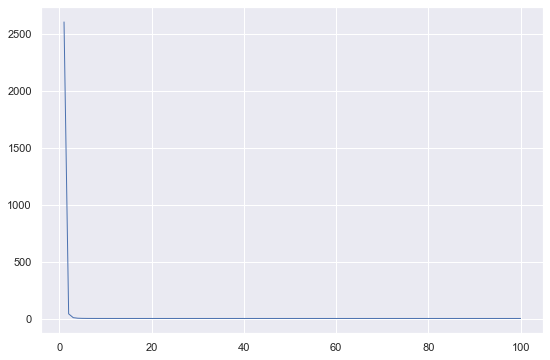

In [138]:
plt.plot(range(1, len(gd.mse_)+1), gd.mse_, linewidth=1);

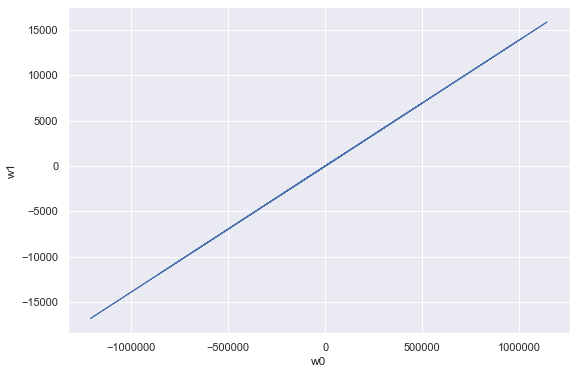

In [134]:
plt.plot(np.array(gd.weights_).T.tolist()[0], np.array(gd.weights_).T.tolist()[1], linewidth=1)
plt.xlabel('w0')
plt.ylabel('w1');